# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

Given that,<br>
Mean, µ = 100,<br>
S.D., σ = 10<br>
Range 1 = [µ + σ, µ + 2σ] = [110,120] <br>
Range 2 = [µ - 2σ, µ - σ] = [80,90]<br>

<b>As clearly seen from the code below, the fraction does start to approach 27.2% as N increases.</b>

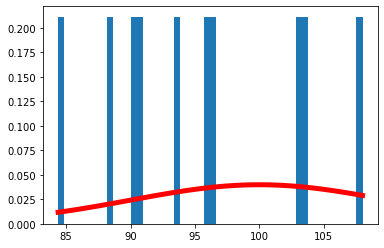

For N= 10 ,fraction M/N = 0.2


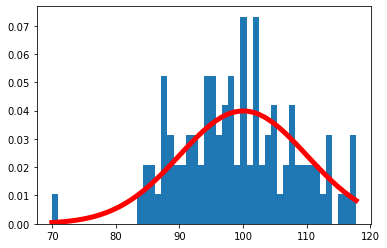


For N= 100 ,fraction M/N = 0.29


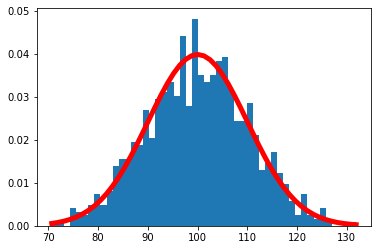


For N= 1000 ,fraction M/N = 0.285


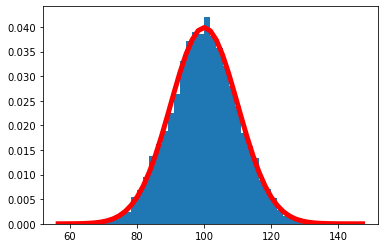


For N= 10000 ,fraction M/N = 0.2726


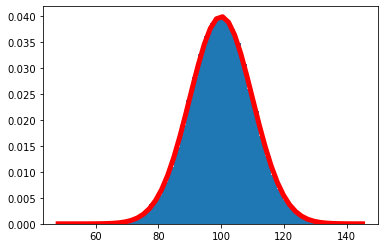


For N= 1000000 ,fraction M/N = 0.27219


In [3]:
#import numpy as np
#import matplotlib.pyplot as pt
# We generate and plot a series of specified size with given mean and standard deviation and following a Gaussian distribution
def gaussrand(mean,sd,n):
    m = 0
    series = np.random.normal(mean,sd,n)
    c,b,j = pt.hist(series,50,density=True)
    pt.plot(b,1/(sd*np.sqrt(2*np.pi))*np.exp(-(b-mean)**2/(2*sd**2)),linewidth=5, color='r')
    pt.show()
#   Check and count how many numbers from the generated series fall in the ranges [80,90] or [110,120]
    for i in range(n):
        if ((series[i]>=110 and series[i]<=120) or (series[i]>=80 and series[i]<=90)):
            m = m+1
    frac = m/n
    return frac

if __name__ == "__main__":
    mean = 100
    sd = 10
    
    n = 10
    print("For N=",n,",fraction M/N =",gaussrand(mean,sd,n))
    
    n = 100
    print("\nFor N=",n,",fraction M/N =",gaussrand(mean,sd,n))
    
    n = 1000
    print("\nFor N=",n,",fraction M/N =",gaussrand(mean,sd,n))
    
    n = 10000
    print("\nFor N=",n,",fraction M/N =",gaussrand(mean,sd,n))
    
    n = 1000000
    print("\nFor N=",n,",fraction M/N =",gaussrand(mean,sd,n))

<font color = 'green'> Correct : 10 points </font> 
Remember to give the imports here next time. I had to write your imports. 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

For a dataset of movie ratings for 500 movies given by 1000 users,<br>
We have 500 columns with movie names, 1000 rows representing the ratings given by each user for each movie.<br>
The values for ratings can be converted to a more suitable format by assigning the values as following:<br>
<li>If the user did not watch the movie, assign 0</li>
<li>For all ratings of 1 and 2 stars, assign 1 (means movie is below average)</li>
<li>For all ratings of 3,4, and 5 stars, assign 2 (means movie is above average)</li>
There would be 500,000 (1000x500) Discrete ordinal data attributes containing movie ratings with possible values as 0,1,2.<br>
Following is a sample dataset of 500 movies and 1000 random ratings for those movies contained in movie_ratings.csv file for reference purposes, as per the above format.

In [18]:
mvr = pb.read_csv('movie_ratings.csv')
print(mvr)

     Movie 1   Movie 2  Movie 3  Movie 4  Movie 5  Movie 6  Movie 7  Movie 8  \
0           2        1        1        2        0        2        2        0   
1           1        1        2        0        1        1        1        0   
2           2        2        1        0        2        1        2        0   
3           0        0        0        2        2        2        1        2   
4           2        1        1        2        0        1        0        1   
..        ...      ...      ...      ...      ...      ...      ...      ...   
995         2        1        0        2        1        0        0        0   
996         2        0        1        0        1        2        1        1   
997         0        1        2        0        1        2        0        1   
998         1        0        2        0        2        1        1        1   
999         2        1        1        0        0        2        1        2   

     Movie 9  Movie 10  ...  Movie 491 

<font color = 'red'> Incorrect : 0 points </font>
Interesting ideas however we need to do the following: 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

Noise and outliers are very close in meaning yet different from each other.
Noise in a dataset are the values that are not correct or are null/void. Noise does not add any meaning to the existing dataset. Instead, it only makes the data processing harder.
Whereas, outliers in a dataset are values which aren't necessarily void of meaning but do not fit in the context of the dataset in question. They fall outside the expected norm of the whole dataset.
Example: In a dataset containing prices (column 1) of all the 3 star hotels in the world along with their names (column 2), if the prices per night of hotels like Burj Al Arab, Sheraton, or Hilton are included, then they are outliers in our pool of data since they are not wrong but aren't relevant to the context of the dataset. On the other hand, if the column of prices contain non-integer data values like "no"/"reverse" etc., then they introduce noise in the dataset since they are not relevant and are wrong data values with respect to the entire dataset.

1. True, noise in data can be in form of noisy attribute values or noise objects or anything that may hinder with the existing data's validity with respect to the entire dataset. Noise in the attribute values can make the data look unusual.

2. False, noise is not desirable at all since it distorts the original attribute values.

3. True, outliers may sometimes be desirable because they are legitimate objects of data in the dataset. Identifying which outliers are desirable and which aren't, is one of the main tasks in the process of data mining.

4. True, noise objects in data do make the data distorted so it is probable that some noise objects may appear as outliers.

5. True, outliers are valid data objects that only appear to have an unexpected value from the dataset but are legitimate. Thus, those outliers don't really qualify to be noise objects.

<font color = 'green'> Correct : 5 points </font> 

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

1. a. <b>Price (in US dollars):</b> Continuous, Quantitative, Ratio <br>
b. <b>Carat (weight of diamond):</b> Continuous, Quantitative, Ratio<br>
c. <b>Cut (quality of the cut):</b> Discrete, Qualitative, Ordinal<br>
d. <b>Color (diamond colour from J (worst) to D (best)):</b> Discrete, Qualitative, Ordinal<br>
e. <b>Clarity (measurement of how clear diamond is I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):</b> Discrete, Qualitative, Ordinal<br>
f. <b>x (length in mm):</b> Continuous, Quantitative, Ratio<br>
g. <b>y (width in mm):</b> Continuous, Quantitative, Ratio<br>
h. <b>z (depth in mm):</b> Continuous, Quantitative, Ratio<br>
i. <b>Depth (total depth %):</b> Continuous, Quantitative, Ratio<br>
j. <b>Table (width of top of diamond relative to widest point):</b> Continuous, Quantitative, Ratio

<font color = 'green'> Correct : 5 points </font> 

#### Solution 4.2

In [10]:
import pandas as pb
from pandas import DataFrame
# Loading diamonds dataset in a dataframe
rec = pb.read_csv('diamonds.csv')
# Printing the first 5 rows of the dataset
print("First 5 rows of the dataset diamonds\n")
print(rec.head(5))

First 5 rows of the dataset diamonds

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.3 - a.

Quantitative attributes in our dataset are: <b>Price, carat, x, y, z, depth, and table</b>

In [11]:
print("Mean, Median, Standard Deviation, and Range for Quantitative attributes:")
print("\nMean carat:",rec['carat'].mean())
print("Median for carat:",rec['carat'].median())
print("Standard Deviation for carat:",rec['carat'].std())
print("Range for carat:",(rec['carat'].max()-rec['carat'].min()))

print("\nMean price:",rec['price'].mean())
print("Median for price:",rec['price'].median())
print("Standard Deviation for price:",rec['price'].std())
print("Range for price:",(rec['price'].max()-rec['price'].min()))

print("\nMean depth:",rec['depth'].mean())
print("Median for depth:",rec['depth'].median())
print("Standard Deviation for depth:",rec['depth'].std())
print("Range for depth:",(rec['depth'].max()-rec['depth'].min()))

print("\nMean table:",rec['table'].mean())
print("Median for table:",rec['table'].median())
print("Standard Deviation for table:",rec['table'].std())
print("Range for table:",(rec['table'].max()-rec['table'].min()))

print("\nMean x:",rec['x'].mean())
print("Median for x:",rec['x'].median())
print("Standard Deviation for x:",rec['x'].std())
print("Range for x:",(rec['x'].max()-rec['x'].min()))

print("\nMean y:",rec['y'].mean())
print("Median for y:",rec['y'].median())
print("Standard Deviation for y:",rec['y'].std())
print("Range for y:",(rec['y'].max()-rec['y'].min()))

print("\nMean z:",rec['z'].mean())
print("Median for z:",rec['z'].median())
print("Standard Deviation for z:",rec['z'].std())
print("Range for z:",(rec['z'].max()-rec['z'].min()))

Mean, Median, Standard Deviation, and Range for Quantitative attributes:

Mean carat: 0.7979397478680014
Median for carat: 0.7
Standard Deviation for carat: 0.4740112444054184
Range for carat: 4.81

Mean price: 3932.799721913237
Median for price: 2401.0
Standard Deviation for price: 3989.439738146379
Range for price: 18497

Mean depth: 61.749404894327036
Median for depth: 61.8
Standard Deviation for depth: 1.432621318833661
Range for depth: 36.0

Mean table: 57.45718390804598
Median for table: 57.0
Standard Deviation for table: 2.2344905628213225
Range for table: 52.0

Mean x: 5.731157211716722
Median for x: 5.7
Standard Deviation for x: 1.1217607467924928
Range for x: 10.74

Mean y: 5.734525954764553
Median for y: 5.71
Standard Deviation for y: 1.1421346741235552
Range for y: 58.9

Mean z: 3.5387337782721544
Median for z: 3.53
Standard Deviation for z: 0.7056988469499941
Range for z: 31.8


#### Solution 4.3 - b.

Qualitative attributes in our dataset are: <b>Cut, color, and clarity</b>

In [12]:
print("Mode for Qualitative attributes:")
print("\nMode for cut:",rec['cut'].mode())
print("\nMode for color:",rec['color'].mode())
print("\nMode for clarity:",rec['clarity'].mode())

Mode for Qualitative attributes:

Mode for cut: 0    Ideal
dtype: object

Mode for color: 0    G
dtype: object

Mode for clarity: 0    SI1
dtype: object


#### Solution 4.3 - c.

In [13]:
import numpy as np

def priceIQR():
    # Sort the price column in ascending order
    sorted(rec['price'])
# Find the first quartile (at 25%)
q1 = np.percentile(rec['price'],[25])
# Find the third quartile (at 75%)
q3 = np.percentile(rec['price'],[75])
# IQR = Q3 - Q1
print("InterQuartile Range of price variable: ",(q3-q1))

InterQuartile Range of price variable:  [4374.25]


<font color = 'green'> Correct : 5.5 points </font>

#### Solution 4.4

In [14]:
import matplotlib.pyplot as pt
print(rec['cut'].value_counts())
# The sum of value counts of cut values - very good,premium, and ideal
sum = 21551+13791+12082
# The total no. of values are
total = rec['cut'].count()
frac = (sum/total)*100
print("\nThe fraction of samples having cut as very good, premium, and ideal are: ",frac.round(4),"%")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

The fraction of samples having cut as very good, premium, and ideal are:  87.9199 %


AxesSubplot(0.125,0.125;0.775x0.755)


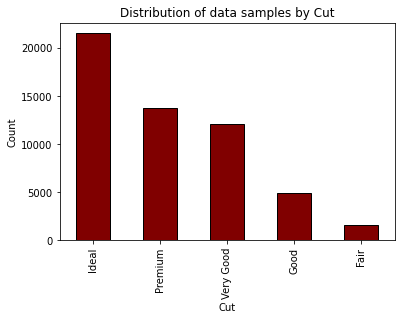

In [26]:
x=rec['cut']
df = pb.DataFrame(x,index=None)
print(df.cut.value_counts().plot(kind='bar',color="maroon",edgecolor='black',title='Distribution of data samples by Cut',xlabel='Cut',ylabel='Count'))

<font color = 'green'> Correct : 2.5 points </font> 

#### Solution 4.5

AxesSubplot(0.125,0.125;0.775x0.755)


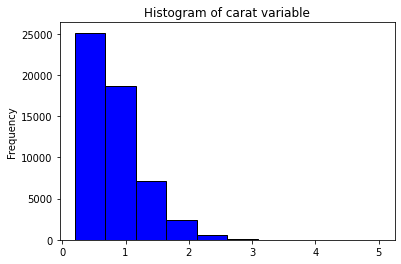

In [27]:
y = rec['carat']
dc = pb.DataFrame(y,index=None)
print(dc.carat.plot(kind='hist',title='Histogram of carat variable',color="blue",edgecolor='black'))

<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.6

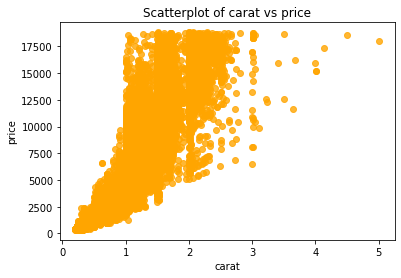

In [299]:
import seaborn as sns
sns.regplot(x=rec['carat'], y=rec['price'],color="orange",fit_reg=False)
pt.title('Scatterplot of carat vs price')
pt.show()

<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.7

In [190]:
# Correlation between carat and price variables
print("Correlation between carat and price is",rec['carat'].corr(rec['price']))

Correlation between carat and price is 0.921591301193476


<font color = 'green'> Correct : 1 point </font>

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

Cosine similarity would be a good measure of similarity here because the angle between the two document vectors measures the orientation and gives a better idea of similarity between the two, than the distance between them.<br>

We have, the frequency of ith word in jth document, <b>tf_ij</b>, and the Inverse document frequency (IDF), <b>idf_ij</b>.<br>
Cosine similarity(document x,document y) = (tf_ix * idf_iy) / sqrt(sum((x - tf_ix)^2)) * sum((y - tf_iy)^2)))<br>
where, i => from 0 to N

<font color = 'blue'> Partially Correct : 1 point </font>
Reasoning: The measure you have selected is correct , however, the formula mentioned is incorrect. 
For the jth document in the collection of m documents, the term frequencies of the n words in the vocabulary are:

tf_1j, tf_2j, tf_3j ... tf_nj

This is the term frequency vector J.

The magnitude of the vector is 

|J| = **Sqrt (Sum (Sqr (tf_1j) + Sqr (tf_2j) ... + Sqr (tf_nj))**

For the kth document in the collection of m documents, the term frequencies of the n words in the vocabulary are: tf_1k, tf_2k, tf_3k ... tf_nk

The magnitude of the vector K is 

|K| = **Sqrt (Sum (Sqr (tf_1k) + Sqr (tf_2k) ... + Sqr (tf_nk))**

The cosine similarity between document j and k is their dot product normalized by their magnitudes.

**(tf_1j * tf_1k + tf_2j * tf_2k + ... +  tf_nj * tf_nk) / (|J| * |K) )**

Alternatively, we can convert each vector into a unit vector by dividing by its magnitude, and then take their dot product.

#### Solution 5.2

The Inverse document frequency idf_ij is mainly used to filter out the irrelevant words with respect to the query. Example: if two documents on the hockey game are to be compared to find how similar they are, it would be irrelevant to compare the occurences of common words like is/the/for/a etc., and more relevant to compare occurences of words like hockey/hockey stick etc. This is why IDF is advantageous.

<font color = 'green'> Correct : 2 points </font> 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [15]:
# Hamming distance between two binary vectors is the no. of bits that are different at the same positions
def hammingdist(x, y):
    c = 0
#   Compare the two binary strings simultaneously and increment count where the bits are different at same position
    for j in range(len(x)):
        if (x[j] != y[j]):
            c = c+1
    return c

# Simple Matching Coefficient (SMC) of two binary vectors is the ratio of -
# sum of no. of matching attributes at same position to sum of matching and non matching attributes at same position
def smc(x,y):
    m = 0
    nm = 0
#   Calculate no. of matching attributes at same position
    for i in range(len(x)):
        if(x[i]==y[i]):
            m = m+1
#   Calculate no. of non-matching attributes at same position (or the Hamming distance)          
    for k in range(len(x)):
        if(x[k]!=y[k]):
            nm = nm+1
    mc = (m/(m+nm))
    return mc

# Jaccard similarity coefficient between two binary vectors is the ratio of -
# sum of the attributes having a set value to the sum of attributes having either of them as a set value and the attributes with set values
def jaccardcoeff(x,y):
    f = 0
    g = 0
#   Calculate the no. of attributes having both values as set (1) in the same position
    for h in range(len(x)):
        if(x[h]=="1" and y[h]=="1"):
            f = f+1
#   Calculate the no. of attributes having either of the values as set (1) in the same position
    for p in range(len(x)):
        if(x[p]!=y[p]):
            g = g+1
#   Calculate the jaccard similarity coefficient
    jacc = (f/(f+g))
    return jacc


if __name__ == "__main__":
    x = "1010101010101"
    y = "1000100010001"
    hd = hammingdist(x, y)
    smc = smc(x,y)
    jsc = jaccardcoeff(x,y)
    print("Given, x =",x,"and y =",y)
    print("Hamming (L1) distance between x and y:",hd)
    print("Simple Matching Coefficient for x and y:",smc)
    print("Jaccard similarity coefficient for x and y:",jsc)

Given, x = 1010101010101 and y = 1000100010001
Hamming (L1) distance between x and y: 3
Simple Matching Coefficient for x and y: 0.7692307692307693
Jaccard similarity coefficient for x and y: 0.5714285714285714


<font color = 'green'> Correct : 6 points </font>

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [16]:
from scipy.spatial import distance

# Cosine similarity between vectors x and y is the -
# dot product of x and y divided by the product of both the vectors' magnitudes
def cossim(x,y):
    dotp = 0
    magx = 0
    magy = 0
#   Calculate dot product of x and y
    for i in range(len(x)):
        dotp = dotp+(x[i]*y[i])
#   Calculate magnitude of vector x
    for j in range(len(x)):
        magx = magx+(x[j]*x[j])
#   Calculate magnitude of vector y
    for k in range(len(y)):
        magy = magy+(y[k]*y[k])
    cosm = dotp/((magx**0.5)*(magy**0.5))
    return cosm

# We take the Pearson Correlation coefficient here - which is
# product of sum of (x_i - mx) and (y_i - my) divided by the square root of product of sum of (x_i - mx) and (y_i - my), squared
# where x_i and y_i are the values of x and y vectors at ith position and mx and my are the means of x and y, respectively.
def corrc(x,y):
    msx = 0
    msy = 0
    num = 0
    denom1 = 0
    denom2 = 0
    for i in range(len(x)):
        msx = x[i]+msx
    for j in range(len(y)):
        msy = y[j]+msy
#   Calculate mean of x and y
    mx = msx/len(x)
    my = msy/len(y)
    for k in range(len(x)):
        num = num+((x[k]-mx)*(y[k]-my))
        denom1 = denom1+((x[k]-mx)**2)
        denom2 = denom2+((y[k]-my)**2)
    try:
        corr = (num/((denom1*denom2)**0.5))
    except ZeroDivisionError:
        corr = 0
    return corr

def jaccardc(x,y):
    f = 0
    g = 0
#   Calculate the no. of attributes having both values as set (1) in the same position
    for h in range(len(x)):
        if(x[h]==1 and y[h]==1):
            f = f+1
#   Calculate the no. of attributes having either of the values as set (1) in the same position
    for p in range(len(x)):
        if(x[p]!=y[p]):
            g = g+1
#   Calculate the jaccard similarity coefficient
    jacc = (f/(f+g))
    return jacc

# Euclidean distance is the square root of the sum of (y_i - x_i) squared.
def euclidd(x,y):
    sum = 0
    for i in range(len(x)):
        sum = sum+((y[i]-x[i])**2)
    return ((sum)**0.5)

if __name__ == "__main__":
    x = (1,1,1,1)
    y = (3,3,3,3)
    print("\nFor x=",x,"and y=",y)
    print("Cosine similarity measure between x and y:",cossim(x,y))
    print("Correlation coefficient between x and y:",corrc(x,y))
    print("Euclidean distance between x and y:",euclidd(x,y))
    
    x = (0,1,0,1,0,1)
    y = (1,0,1,0,1,0)
    print("\nFor x=",x,"and y=",y)
    print("Cosine similarity measure between x and y:",cossim(x,y))
    print("Correlation coefficient between x and y:",corrc(x,y))
    print("Euclidean distance between x and y:",euclidd(x,y))
    print("Jaccard similarity coefficient of x and y:",jaccardc(x,y))
    
    x = (1,1,0,1,0,1)
    y = (1,1,1,0,0,1)
    print("\nFor x=",x,"and y=",y)
    print("Cosine similarity measure between x and y:",cossim(x,y))
    print("Correlation coefficient between x and y:",corrc(x,y))
    print("Lmax (or Chebyshev) distance between x and y:",distance.chebyshev(x,y))
    print("Jaccard similarity coefficient of x and y:",jaccardc(x,y))


For x= (1, 1, 1, 1) and y= (3, 3, 3, 3)
Cosine similarity measure between x and y: 1.0
Correlation coefficient between x and y: 0
Euclidean distance between x and y: 4.0

For x= (0, 1, 0, 1, 0, 1) and y= (1, 0, 1, 0, 1, 0)
Cosine similarity measure between x and y: 0.0
Correlation coefficient between x and y: -1.0
Euclidean distance between x and y: 2.449489742783178
Jaccard similarity coefficient of x and y: 0.0

For x= (1, 1, 0, 1, 0, 1) and y= (1, 1, 1, 0, 0, 1)
Cosine similarity measure between x and y: 0.75
Correlation coefficient between x and y: 0.25
Lmax (or Chebyshev) distance between x and y: 1
Jaccard similarity coefficient of x and y: 0.6


<font color = 'blue'> Partially correct : 5 points </font>
Reasoning: 
You were asked to show the computation and the computation for Lmax has not been done. 

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

Submitted by: Suvrat Jain<br>

<font color = 'green'> Total score: 49/56 </font> 